In [1]:
#The CryptoKnights database has a table called "replay_data" that records information about each round of CryptoKnights battles in a best of 3 round game. 
#The 'replay_data' table includes the 'player_id', 'round', 'created_at(timestamp)', 'replay_type', 'round_win' data. 
#The CryptoKnights game has 3 game modes. "Player vs. Player", "AI vs. Player", and "Custom_game". Before reading the data into this notebook I used SQL and the Cassandra database to split the information into 3 seperate tables so each game type could be analyzed individually.

# add all necessary packages 
# read in data from .csv files

import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt

replay_ai= pd.read_csv('replay_data_ai_match.csv')
replay_ai = replay_ai.sort_values('created_at')
replay_pvp = pd.read_csv('replay_data_pvp.csv')
replay_pvp = replay_pvp.sort_values('created_at')
replay_custom = pd.read_csv('replay_data_custom_match.csv')
replay_custom = replay_custom.sort_values('created_at')

#heres an idea of what the origional data tables look like.
print(replay_ai)

                                  player_id  round               created_at  \
66087  645cf3b6-76ad-453b-a8de-4f9ca5b7609b      0  2022-07-04 01:09:03.161   
66088  645cf3b6-76ad-453b-a8de-4f9ca5b7609b      1  2022-07-04 01:10:09.680   
66089  645cf3b6-76ad-453b-a8de-4f9ca5b7609b      2  2022-07-04 01:11:25.538   
66066  645cf3b6-76ad-453b-a8de-4f9ca5b7609b      0  2022-07-04 01:12:57.176   
66067  645cf3b6-76ad-453b-a8de-4f9ca5b7609b      1  2022-07-04 01:14:04.289   
...                                     ...    ...                      ...   
12850  98f78725-0564-4f25-809a-d061077e6190      1  2022-09-23 00:57:38.034   
12842  98f78725-0564-4f25-809a-d061077e6190      0  2022-09-23 00:58:55.807   
12843  98f78725-0564-4f25-809a-d061077e6190      1  2022-09-23 00:59:57.072   
68959  b8d17d59-9e0e-4f5d-aa2b-02750b1bbf4c      0  2022-09-23 02:00:14.319   
68960  b8d17d59-9e0e-4f5d-aa2b-02750b1bbf4c      1  2022-09-23 02:00:52.828   

       round_win replay_type  
66087          0    

In [2]:
#replay_ai analysis


#In the origional replay_data table the round column uses the values 0, 1, and 2 to signify rounds 1,2 and 3 in a best of 3 round CryptoKnights battle.
#Our analysis was not interested in the number of rounds being played but the total number of games. Therefore we filtered the data for only rows with the round column equal to 0s.  
#This is because every battle, no matter how many rounds, must have a round 0. Therefore we can use these rows to measure the total number of games played. 
#In Certain CryptoKnights matches, where one player forfeits, autimatically awards the remaining player with a '2' in the 'round_win' column.  We are more interested in looking at data for nonforfeited game so I filtered those rows out as well.   
replay_ai_gamecount = replay_ai[(replay_ai['round']== 0) & (replay_ai['round_win']!= 2)].copy()

#add day, week, month columns to table 
replay_ai_gamecount['day'] = pd.to_datetime(replay_ai_gamecount['created_at']).dt.day 
replay_ai_gamecount['week'] = pd.to_datetime(replay_ai_gamecount['created_at']).dt.isocalendar().week 
replay_ai_gamecount['month'] = pd.to_datetime(replay_ai_gamecount['created_at']).dt.month 

#Seperate data by month(7=july, 8=august, 9=september in the month column) and count the number of games perday of the month.
replay_ai_july = replay_ai_gamecount[replay_ai_gamecount['month']==7].copy()
daily_aigames_july = replay_ai_july.groupby('day')['created_at'].count().reset_index()
#calculate total ai_games in july
print(daily_aigames_july.sum())

replay_ai_august = replay_ai_gamecount[replay_ai_gamecount['month']==8].copy()
daily_aigames_august = replay_ai_august.groupby('day')['created_at'].count().reset_index()
#calculate total ai_games in august
print(daily_aigames_august.sum())

replay_ai_september = replay_ai_gamecount[replay_ai_gamecount['month']==9].copy()
daily_aigames_september = replay_ai_september.groupby('day')['created_at'].count().reset_index()
#calculate total ai_games in september
print(daily_aigames_september.sum())

day             490
created_at    19279
dtype: int64
day             496
created_at    10248
dtype: int64
day            276
created_at    4132
dtype: int64


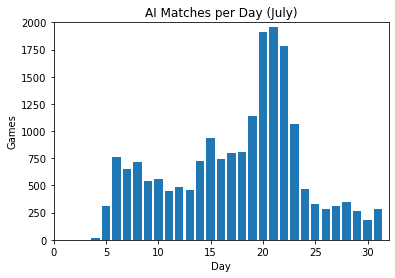

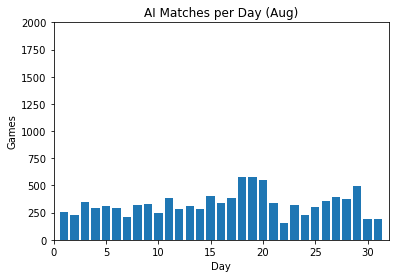

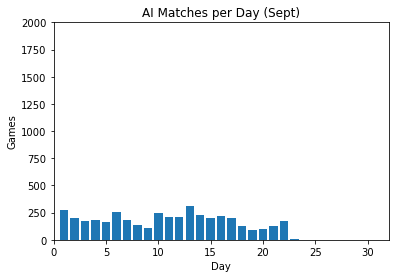

In [3]:
#graph ai games data
plt.bar(daily_aigames_july['day'], daily_aigames_july['created_at'])
plt.title('AI Matches per Day (July)')
plt.xlabel('Day')
plt.xlim (0, 32)
plt.ylabel('Games')
plt.ylim (0, 2000)
plt.show()

plt.bar(daily_aigames_august['day'], daily_aigames_august['created_at'])
plt.title('AI Matches per Day (Aug)')
plt.xlabel('Day')
plt.xlim (0, 32)
plt.ylabel('Games')
plt.ylim (0, 2000)
plt.show()

plt.bar(daily_aigames_september['day'], daily_aigames_september['created_at'])
plt.title('AI Matches per Day (Sept)')
plt.xlabel('Day')
plt.xlim (0, 32)
plt.ylabel('Games')
plt.ylim (0, 2000)
plt.show()

In [4]:
#replay_pvp analysis

#filtered the data for only rows with the 'round' column value equal to 0s.  
#Filtered for 'round_win' column values not equal to 2.  
replay_pvp_games = replay_pvp[(replay_pvp['round']==0) & (replay_pvp['round_win']!=2)].copy()

#add day, week, month columns to table 
replay_pvp_games['day'] = pd.to_datetime(replay_pvp_games['created_at']).dt.day 
replay_pvp_games['week'] = pd.to_datetime(replay_pvp_games['created_at']).dt.isocalendar().week 
replay_pvp_games['month'] = pd.to_datetime(replay_pvp_games['created_at']).dt.month 

#Seperate data by month
replay_pvp_july = replay_pvp_games[replay_pvp_games['month']==7].copy()
daily_pvpgames_july = replay_pvp_july.groupby('day')['created_at'].count().reset_index()
#divide total logs by 2 as pvp has 2 players each 
daily_pvpgames_july['games'] = daily_pvpgames_july['created_at']/2
#calculate total pvp games in july
print(daily_pvpgames_july.sum())

replay_pvp_august = replay_pvp_games[replay_pvp_games['month']==8].copy()
daily_pvpgames_august = replay_pvp_august.groupby('day')['created_at'].count().reset_index()
#divide total logs by 2 as pvp has 2 players each 
daily_pvpgames_august['games'] = daily_pvpgames_august['created_at']/2
#calculate total pvp games in august
print(daily_pvpgames_august.sum())

replay_pvp_september = replay_pvp_games[replay_pvp_games['month']==9].copy()
daily_pvpgames_september = replay_pvp_september.groupby('day')['created_at'].count().reset_index()
#divide total logs by 2 as pvp has 2 players each 
daily_pvpgames_september['games'] = daily_pvpgames_september['created_at']/2
#calculate total pvp games in september
print(daily_pvpgames_september.sum())

day            486.0
created_at    2101.0
games         1050.5
dtype: float64
day           472.0
created_at    619.0
games         309.5
dtype: float64
day           118.0
created_at    121.0
games          60.5
dtype: float64


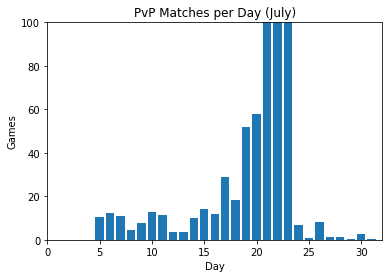

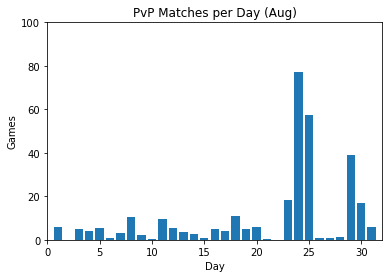

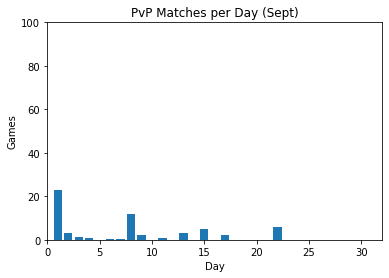

In [5]:
#graph pvp game data 
plt.bar(daily_pvpgames_july['day'], daily_pvpgames_july['games'])
plt.title('PvP Matches per Day (July)')
plt.xlabel('Day')
plt.xlim (0, 32)
plt.ylabel('Games')
plt.ylim (0, 100)
plt.show()

plt.bar(daily_pvpgames_august['day'], daily_pvpgames_august['games'])
plt.title('PvP Matches per Day (Aug)')
plt.xlabel('Day')
plt.xlim (0, 32)
plt.ylabel('Games')
plt.ylim (0, 100)
plt.show()

plt.bar(daily_pvpgames_september['day'], daily_pvpgames_september['games'])
plt.title('PvP Matches per Day (Sept)')
plt.xlabel('Day')
plt.xlim (0, 32)
plt.ylabel('Games')
plt.ylim (0, 100)
plt.show()

In [6]:
#replay_custom analysis

#filtered the data for only rows with the 'round' column value equal to 0s.  
#Filtered for 'round_win' column values not equal to 2.  
replay_custom_games = replay_custom[(replay_custom['round']== 0) & (replay_custom['round_win']!=2)].copy()

#add day, week, month rows to table 
replay_custom_games['day'] = pd.to_datetime(replay_custom_games['created_at']).dt.day 
replay_custom_games['week'] = pd.to_datetime(replay_custom_games['created_at']).dt.isocalendar().week 
replay_custom_games['month'] = pd.to_datetime(replay_custom_games['created_at']).dt.month 

#seperate tables for each month
replay_custom_july = replay_custom_games[replay_custom_games['month']==7]
daily_custom_july = replay_custom_july.groupby('day')['created_at'].count().reset_index()
#divide total logs by 2 as pvp has 2 players each 
daily_custom_july['games'] = daily_custom_july['created_at']/2
#calculate total custom games in july
print(daily_custom_july.sum())

replay_custom_august = replay_custom_games[replay_custom_games['month']==8]
daily_custom_august = replay_custom_august.groupby('day')['created_at'].count().reset_index()
#divide total logs by 2 as pvp has 2 players each 
daily_custom_august['games'] = daily_custom_august['created_at']/2
#calculate total custom games in aug
print(daily_custom_august.sum())

replay_custom_september = replay_custom_games[replay_custom_games['month']==9]
daily_custom_september = replay_custom_september.groupby('day')['created_at'].count().reset_index()
#divide total logs by 2 as pvp has 2 players each 
daily_custom_september['games'] = daily_custom_september['created_at']/2
#calculate total custom games in sept
print(daily_custom_september.sum())

day            391.0
created_at    1433.0
games          716.5
dtype: float64
day           438.0
created_at    610.0
games         305.0
dtype: float64
day            75.0
created_at    224.0
games         112.0
dtype: float64


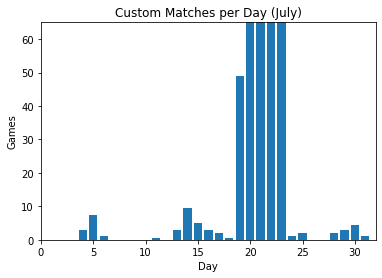

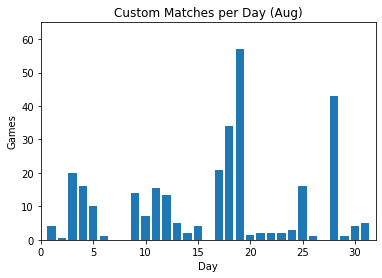

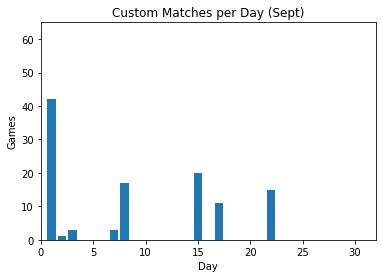

In [7]:
#graph custom game data
plt.bar(daily_custom_july['day'], daily_custom_july['games'])
plt.title('Custom Matches per Day (July)')
plt.xlabel('Day')
plt.xlim (0,32)
plt.ylabel('Games')
plt.ylim (0,65)
plt.show()

plt.bar(daily_custom_august['day'], daily_custom_august['games'])
plt.title('Custom Matches per Day (Aug)')
plt.xlabel('Day')
plt.xlim (0,32)
plt.ylabel('Games')
plt.ylim (0,65)
plt.show()

plt.bar(daily_custom_september['day'], daily_custom_september['games'])
plt.title('Custom Matches per Day (Sept)')
plt.xlabel('Day')
plt.xlim (0,32)
plt.ylabel('Games')
plt.ylim (0,65)
plt.show()

In [8]:
#here ill count the numbet of distinct User_ids login for each months AI_matches.  This was accomplished by grouping the data based on player_id then counting all grouped player_ids. 

#for ai_matches july
distinct_player_ai_july = (replay_ai_gamecount[replay_ai_gamecount['month'] == 7]).copy()
distinct_player_ai_july = distinct_player_ai_july.groupby('player_id')['round'].count()
#count total unique player_ids for ai games in july
print(distinct_player_ai_july.count())

#for ai_matches august
distinct_player_ai_aug = (replay_ai_gamecount[replay_ai_gamecount['month'] == 8]).copy()
distinct_player_ai_aug = distinct_player_ai_aug.groupby('player_id')['round'].count()
#count total unique player_ids for ai games in aug
print(distinct_player_ai_aug.count())

#for ai_matches september
distinct_player_ai_sept = (replay_ai_gamecount[replay_ai_gamecount['month'] == 9]).copy()
distinct_player_ai_sept = distinct_player_ai_sept.groupby('player_id')['round'].count()
#count total unique player_ids for ai games in sept
print(distinct_player_ai_sept.count())


573
230
106


In [9]:
#here ill count the numbet of distinct User_ids login for each months Pvp matches 
#for pvp_matches july

distinct_player_pvp_july = (replay_pvp_games[replay_pvp_games['month'] == 7]).copy()
distinct_player_pvp_july = distinct_player_pvp_july.groupby('player_id')['round'].count()
#count total unique player_ids for pvp games in july
print(distinct_player_pvp_july.count())

#for pvp_matches aug
distinct_player_pvp_aug = (replay_pvp_games[replay_pvp_games['month'] == 8]).copy()
distinct_player_pvp_aug = distinct_player_pvp_aug.groupby('player_id')['round'].count()
#count total unique player_ids for pvp games in aug
print(distinct_player_pvp_aug.count())

#for pvp_matches aug
distinct_player_pvp_sept = (replay_pvp_games[replay_pvp_games['month'] == 9]).copy()
distinct_player_pvp_sept = distinct_player_pvp_sept.groupby('player_id')['round'].count()
#count total unique player_ids for pvp games in sept
print(distinct_player_pvp_sept.count())

346
126
47


In [10]:
#here ill count the number of distinct player_ids for each months custom_matches 

#july
distinct_player_custom_july = (replay_custom_games[replay_custom_games['month'] == 7]).copy()
distinct_player_custom_july = distinct_player_custom_july.groupby('player_id')['round'].count()
#count total unique player_ids for custom games in july
print(distinct_player_pvp_sept.count())

#august
distinct_player_custom_aug = (replay_custom_games[replay_custom_games['month'] == 8]).copy()
distinct_player_custom_aug = distinct_player_custom_aug.groupby('player_id')['round'].count()
#count total unique player_ids for custom games in aug
print(distinct_player_pvp_aug.count())

#sept
distinct_player_custom_sept = (replay_custom_games[replay_custom_games['month'] == 9]).copy()
distinct_player_custom_sept = distinct_player_custom_sept.groupby('player_id')['round'].count()
#count total unique player_ids for custom games in sept
print(distinct_player_pvp_sept.count())

47
126
47
